# SVM (Support vector machine)

Lo que trata de hacer este tipo de clasificacion es, separar los datos de una forma que se pueda 
trasar un vector entre ellos, cuando ya tenemos esa vectorizacion, podemos crear una linea 
recta que se ajuste mas a los valores y medir la distancia para saber a que tipo de clasificacion 
pertenece.

Siempre tenemos que definir que las clases se pueden expresar como valores positivos y negativos
en este caso la clase 1 se dice que >= 1 en su valores, mientras que la clase dos se puede decir 
que es class 2 <= -1.

[[0.0799781  0.26467908]]
[0.89697376]


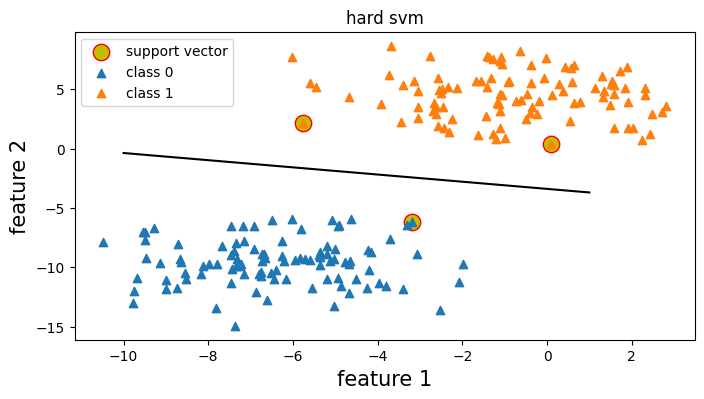

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm


plt.figure(figsize=(8,4))

def plot_line(slope,intercept, X):
    min_x = int(min(X[:,0]))
    max_x = int(max(X[:,0]))

    x = range(min_x,max_x)
    y = -(x*slope[0] + intercept)/slope[1]

    plt.plot(x,y,color='black')
    return

CENTERS = 2

X,y = make_blobs(n_samples=200, n_features=2, centers=CENTERS, random_state=11,
                 cluster_std=2)

clf = svm.SVC(kernel='linear')
clf.fit(X,y)

print(clf.coef_)
print(clf.intercept_)

plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],
            marker='o', edgecolors='r', color='y', s = 140,
            label='support vector')

for target in range(CENTERS):
    plt.scatter(X[y == target,0], X[y == target,1], marker='^',
                label='class '+ format(target))
    
plot_line(clf.coef_[0],clf.intercept_,X)
plt.xlabel('feature 1', fontsize=15)
plt.ylabel('feature 2', fontsize=15)
plt.title('hard svm')
plt.legend()
plt.show()


## Soft and hard margin

Este es un termino que nos referimos cuando queres en el modelo saber si la 
penalizacion que queremos tiene que ser grande en la muestra o no, en este caso particular 
cuando vemos que la informacion esta creando un overfitting o hay data que esta afectando nuestro 
modelo, podemos decidir applicar una penalizacion fuerte a encontrar los margenes, el cual 
excluira los datos que estan afectando mas a la distribucion.

por el otro lado, cuando vemos que hay valores que estan afectando la distribucion pero 
necesitamos esos valores de todas maneras, aplicamos un soft margin para 
penalizar pero no del todo los valores que estan causando ese problema 

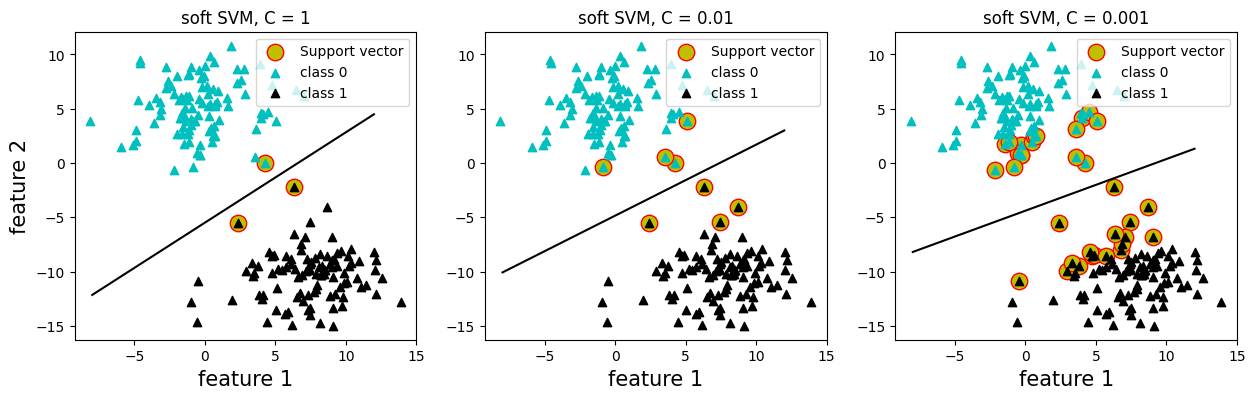

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm

LABELS = 2

fig, axs = plt.subplots(1,3, figsize=(15,4))

# C es las penalizaciones applicadas, en este caso entre mas grande(hard) y mas suaves(soft)
def plot(clf,X,C,ax):
    axs[ax].scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],
                    marker='o', edgecolor='r', color='y', s=140, label='Support vector')
    
    for target,color in zip(range(LABELS),['c','k']):
        axs[ax].scatter(X[y==target,0], X[y==target,1], marker='^',
                        color=color, label='class ' + format(target))
    
    plot_line(clf.coef_[0],clf.intercept_,X,ax)
    axs[ax].set_xlabel('feature 1', fontsize=15)
    if ax == 0:
        axs[ax].set_ylabel('feature 2', fontsize=15)
    
    axs[ax].set_title('soft SVM, C = ' + str(C))
    axs[ax].legend()
    return
    

# in lineal equation(y = wx + b) we need the slope B and the intercept B 
def plot_line(slope,intercept, X,ax):
    min_x = int(min(X[:,0]))
    max_x = int(max(X[:,0]))
    x = range(min_x,max_x)
    y = -(x * slope[0] + intercept) / slope[1]
    axs[ax].plot(x,y,color='black')
    return

X, y = make_blobs(n_samples=200, n_features=2, centers=LABELS, random_state=14, cluster_std=2.5)

for C,ax in zip([1,0.01,0.001], range(3)):
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X,y)
    plot(clf,X,C,ax)

plt.show()